# Homework: 08

- This a model to classify types of hair 
- Using neural network and deep learning

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# define the seed

seed =42
np.random.seed(seed)
tf.random.set_seed(seed)

Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

The shape for input should be (200, 200, 3)
Next, create a convolutional layer (Conv2D):
Use 32 filters
Kernel size should be (3, 3) (that's the size of the filter)
Use 'relu' as activation
Reduce the size of the feature map with max pooling (MaxPooling2D)
Set the pooling size to (2, 2)
Turn the multi-dimensional result into vectors using a Flatten layer
Next, add a Dense layer with 64 neurons and 'relu' activation
Finally, create the Dense layer with 1 neuron - this will be the output
The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)

## Q1
- Since we have a binary classification problem, what is the best loss function for us?

### Ans: 1
- Binary crossentropy

- Why?
- - Mathematical Foundation: Binary Cross-Entropy measures the performance of a classification model whose output is a probability value between 0 and 1. It's based on the concept of information theory, which measures the difference between two probability distributions: the true labels and the predicted probabilities.

## Q2 What's the total number of parameters of the model? You can use the summary method for that.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
             metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Ans 2:
 - Trainable params: 20,073,473 (76.57 MB)


### Question 3
- What is the median of training accuracy for all the epochs for this model?



In [9]:
# Define the train and test locations.
train_dir = './data/train'
test_dir = './data/test'

In [10]:
# Define train and test datagen.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:

# Define train generator.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [12]:
# Define test generator.
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [13]:
# Print the data_batch and labels_batch.
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [14]:

# Train the model.
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

c:\Users\David\OneDrive\Desktop\mlzoomcamp_2024\mlvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 868ms/step - accuracy: 0.5381 - loss: 0.7773 - val_accuracy: 0.5124 - val_loss: 0.6963
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 496ms/step - accuracy: 0.5072 - loss: 0.6954 - val_accuracy: 0.5124 - val_loss: 0.6928
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 449ms/step - accuracy: 0.5217 - loss: 0.6834 - val_accuracy: 0.5473 - val_loss: 0.6781
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 394ms/step - accuracy: 0.6266 - loss: 0.6604 - val_accuracy: 0.5672 - val_loss: 0.6701
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.6221 - loss: 0.6223 - val_accuracy: 0.5672 - val_loss: 0.6581
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.6981 - loss: 0.5775 - val_accuracy: 0.6517 - val_loss: 0.6257
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 532ms/step - accuracy: 0.6946 - loss: 0.5636 - val_accuracy: 0.6368 - val_loss: 0.6309
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step - accuracy: 0.7078 - loss: 0.5563 - val_accu

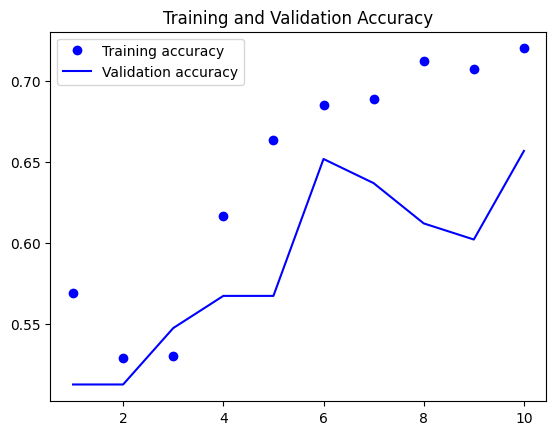

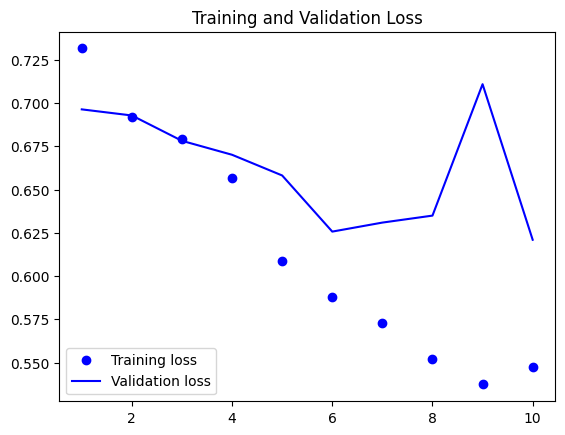

In [15]:
# Plot the history.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [16]:
train_accuracy_median = np.median(accuracy)
train_accuracy_median

np.float64(0.6743749976158142)

### Ans 3 :
- 0.67

#### Question 4
- What is the standard deviation of training loss for all the epochs for this model?

In [18]:
train_loss_std = np.std(loss)

print(train_loss_std,round(train_loss_std, 3))

0.06516617508516377 0.065


#### Ans 4:
- 0.065

#### Question 5
Let's train our model for 10 more epochs using the same code as previously.

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [19]:
# Continue the model training with augmentations.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 800 images belonging to 2 classes.


c:\Users\David\OneDrive\Desktop\mlzoomcamp_2024\mlvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 714ms/step - accuracy: 0.6397 - loss: 0.6179 - val_accuracy: 0.6567 - val_loss: 0.6056
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.6361 - loss: 0.6466 - val_accuracy: 0.6269 - val_loss: 0.6612
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 565ms/step - accuracy: 0.6371 - loss: 0.6263 - val_accuracy: 0.6766 - val_loss: 0.6056
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 560ms/step - accuracy: 0.6226 - loss: 0.6553 - val_accuracy: 0.6816 - val_loss: 0.6003
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 552ms/step - accuracy: 0.6279 - loss: 0.6437 - val_accuracy: 0.6567 - val_loss: 0.6333
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 677ms/step - accuracy: 0.6774 - loss: 0.5902 - val_accuracy: 0.6517 - val_loss: 0.5823
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 595ms/step - accuracy: 0.6670 - loss: 0.6040 - val_accuracy: 0.6716 - val_loss: 0.5825
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.6315 - loss: 0.6374 - val_accu

In [24]:

val_loss_mean = np.mean(val_loss)
print(val_loss_mean, round(val_loss_mean, 3))


0.6618772625923157 0.662


#### Ans 05:
- 0.662

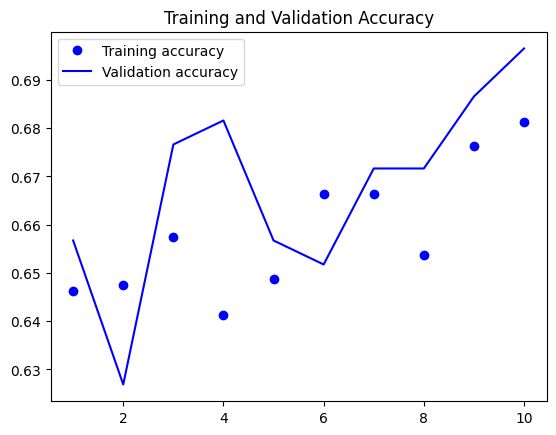

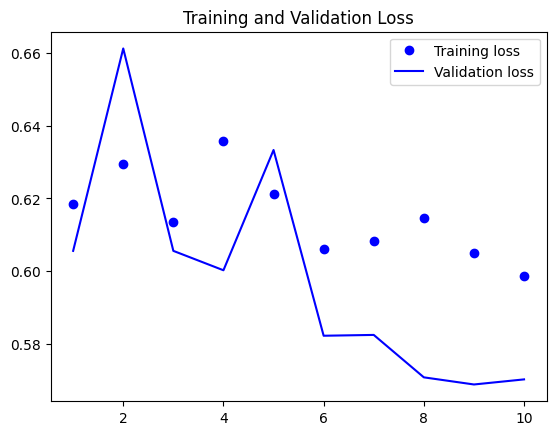

In [26]:
# Plot the history.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#### Question 6 :
- What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [27]:
val_accuracy[5:]

[0.6517412662506104,
 0.6716417670249939,
 0.6716417670249939,
 0.6865671873092651,
 0.6965174078941345]

In [31]:

mean_test_last_5 = np.mean(val_accuracy[5:])
print(mean_test_last_5, round(mean_test_last_5, 3))

0.6756218791007995 0.676


##### Ans 6:
 - 0.676